In [1]:
pip install pattern

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("pySpWordCount").getOrCreate()
sc = spark.sparkContext

In [7]:
textFile = sc.textFile("./dataSet//char2.txt")

In [8]:
words = textFile.flatMap(lambda line:line.lower().split(" "))

In [10]:
wrds = words.collect()
print(len(wrds))
print(wrds)

206
['a', 'data', 'stream', 'is', 'an', 'unbounded', 'sequence', 'of', 'data', 'arriving', 'continuously.', 'streaming', 'divides', 'continuously', 'flowing', 'input', 'data', 'into', 'discrete', 'units', 'for', 'further', 'processing.', 'stream', 'processing', 'is', 'low', 'latency', 'processing', 'and', 'analyzing', 'of', 'streaming', 'data.', '', 'spark', 'streaming', 'was', 'added', 'to', 'apache', 'spark', 'in', '2013,', 'an', 'extension', 'of', 'the', 'core', 'spark', 'api', 'that', 'provides', 'scalable,', 'high-throughput', 'and', 'fault-tolerant', 'stream', 'processing', 'of', 'live', 'data', 'streams.', 'data', 'ingestion', 'can', 'be', 'done', 'from', 'many', 'sources', 'like', 'kafka,', 'apache', 'flume,', 'amazon', 'kinesis', 'or', 'tcp', 'sockets', 'and', 'processing', 'can', 'be', 'done', 'using', 'complex', 'algorithms', 'that', 'are', 'expressed', 'with', 'high-level', 'functions', 'like', 'map,', 'reduce,', 'join', 'and', 'window.', 'finally,', 'processed', 'data', 'c

<center><h1>Remove Stop Word</h1></center>

In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords

In [17]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
stp_words = list(stopwords.words('english'))

In [19]:
len(stp_words)

179

In [20]:
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
words_wo_sw = words.filter(lambda x: (x not in stp_words) and (x != ''))

In [22]:
wrds_wo_sw = words_wo_sw.collect()
print(len(wrds_wo_sw))
print(wrds_wo_sw)

135
['data', 'stream', 'unbounded', 'sequence', 'data', 'arriving', 'continuously.', 'streaming', 'divides', 'continuously', 'flowing', 'input', 'data', 'discrete', 'units', 'processing.', 'stream', 'processing', 'low', 'latency', 'processing', 'analyzing', 'streaming', 'data.', 'spark', 'streaming', 'added', 'apache', 'spark', '2013,', 'extension', 'core', 'spark', 'api', 'provides', 'scalable,', 'high-throughput', 'fault-tolerant', 'stream', 'processing', 'live', 'data', 'streams.', 'data', 'ingestion', 'done', 'many', 'sources', 'like', 'kafka,', 'apache', 'flume,', 'amazon', 'kinesis', 'tcp', 'sockets', 'processing', 'done', 'using', 'complex', 'algorithms', 'expressed', 'high-level', 'functions', 'like', 'map,', 'reduce,', 'join', 'window.', 'finally,', 'processed', 'data', 'pushed', 'filesystems,', 'databases', 'live', 'dashboards.', 'internal', 'working', 'follows.', 'live', 'input', 'data', 'streams', 'received', 'divided', 'batches', 'spark', 'streaming,', 'batches', 'processe

In [26]:
import nltk

In [27]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [28]:
import re
from pattern.en import singularize

In [29]:
punc = '[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [34]:
wordMap = words_wo_sw.map(lambda word: (singularize(re.sub(punc," ",word)), 1))

In [35]:
wrdMp = wordMap.collect()
sorted_word = sorted(wrdMp)
print(sorted_word)

[('2013', 1), ('abstraction', 1), ('abstraction', 1), ('added', 1), ('algorithm', 1), ('allows', 1), ('amazon', 1), ('analyzing', 1), ('apache', 1), ('apache', 1), ('apache', 1), ('apache', 1), ('apus', 1), ('arriving', 1), ('batch', 1), ('batch', 1), ('batch', 1), ('batch', 1), ('built', 1), ('complex', 1), ('component', 1), ('continuously', 1), ('continuously', 1), ('core', 1), ('core', 1), ('dashboard', 1), ('databasis', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('datum', 1), ('discrete', 1), ('discretized', 1), ('divide', 1), ('divided', 1), ('divided', 1), ('done', 1), ('done', 1), ('dstream', 1), ('dstream', 1), ('engine', 1), ('expressed', 1), ('extension', 1), ('faulttolerant', 1), ('filesystem', 1), ('final', 1), ('finally', 1), ('flowing', 1), ('flume', 1), ('follow', 1), ('function', 1), ('generate', 1), ('highlevel', 1), ('highthroughput', 1), ('ingestion', 1), ('input', 1), ('input', 1)

In [37]:
wordCount = wordMap.reduceByKey(lambda a,b: a+b)
wrdCount = sorted(wordCount.collect())
print(len(wrdCount))
print(wrdCount)

82
[('2013', 1), ('abstraction', 2), ('added', 1), ('algorithm', 1), ('allows', 1), ('amazon', 1), ('analyzing', 1), ('apache', 4), ('apus', 1), ('arriving', 1), ('batch', 4), ('built', 1), ('complex', 1), ('component', 1), ('continuously', 2), ('core', 2), ('dashboard', 1), ('databasis', 1), ('datum', 10), ('discrete', 1), ('discretized', 1), ('divide', 1), ('divided', 2), ('done', 2), ('dstream', 2), ('engine', 1), ('expressed', 1), ('extension', 1), ('faulttolerant', 1), ('filesystem', 1), ('final', 1), ('finally', 1), ('flowing', 1), ('flume', 1), ('follow', 1), ('function', 1), ('generate', 1), ('highlevel', 1), ('highthroughput', 1), ('ingestion', 1), ('input', 2), ('integrate', 1), ('internal', 1), ('join', 1), ('kafka', 1), ('key', 1), ('kinesi', 1), ('latency', 1), ('like', 3), ('live', 3), ('low', 1), ('many', 1), ('map', 1), ('mllib', 1), ('or', 1), ('processed', 2), ('processing', 5), ('provide', 1), ('pushed', 1), ('rdd', 1), ('received', 1), ('reduce', 1), ('represent', 1

In [42]:
import matplotlib.pyplot as plt


In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud

In [44]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height=500).generate(str(wrdCount))

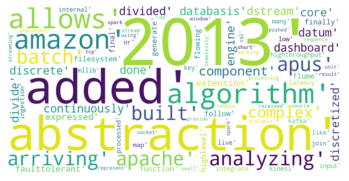

In [45]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.rcParams['figure.figsize'] = [15, 8]

In [50]:
df = spark.createDataFrame(wrdCount,['Word','Count'])
df.show(5)

+-----------+-----+
|       Word|Count|
+-----------+-----+
|       2013|    1|
|abstraction|    2|
|      added|    1|
|  algorithm|    1|
|     allows|    1|
+-----------+-----+
only showing top 5 rows



In [57]:
df.write.mode("overwrite").csv('./dataSet//wordCount')

Py4JJavaError: An error occurred while calling o136.csv.
: java.util.NoSuchElementException: None.get
	at scala.None$.get(Option.scala:529)
	at scala.None$.get(Option.scala:527)
	at org.apache.spark.sql.execution.datasources.BasicWriteJobStatsTracker$.metrics(BasicWriteStatsTracker.scala:242)
	at org.apache.spark.sql.execution.command.DataWritingCommand.metrics(DataWritingCommand.scala:55)
	at org.apache.spark.sql.execution.command.DataWritingCommand.metrics$(DataWritingCommand.scala:55)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.metrics$lzycompute(InsertIntoHadoopFsRelationCommand.scala:47)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.metrics(InsertIntoHadoopFsRelationCommand.scala:47)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.metrics$lzycompute(commands.scala:109)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.metrics(commands.scala:109)
	at org.apache.spark.sql.execution.SparkPlanInfo$.fromSparkPlan(SparkPlanInfo.scala:63)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:106)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:176)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:560)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:116)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:860)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:390)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:363)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:851)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:745)


In [54]:
sc.stop()
spark.stop()

In [49]:
print("eforaxcel")

eforaxcel


In [ ]:
./dataSet//char2.txt